In [2]:
from statsmodels.formula.api import ols
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("combined.csv")

data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d %H:%M:%S")
# data["hour"] = data["date"].dt.hour
data.index = data["date"]
data = data.drop("date", axis=1)
data = data.drop("date.1", axis=1)
data = data.fillna(0)

data

,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,
2017-01-01 00:00:00,4.2,0.0,2.1,320.0,68.0,1021.5,0.0,20000.0,0.0
2017-01-01 01:00:00,4.1,0.0,1.9,320.0,67.0,1021.4,0.0,20000.0,0.0
2017-01-01 02:00:00,3.9,0.0,1.0,250.0,68.0,1021.7,0.0,20000.0,0.0
2017-01-01 03:00:00,3.7,0.0,1.9,320.0,70.0,1021.6,0.0,20000.0,0.0
2017-01-01 04:00:00,3.6,0.0,1.1,50.0,72.0,1020.7,0.0,17950.0,0.0
...,...,...,...,...,...,...,...,...,...
2023-10-18 19:00:00,18.7,0.0,1.8,180.0,72.0,15.5,2.0,4057.0,0.0
2023-10-18 20:00:00,16.4,0.0,0.7,200.0,84.0,15.6,3.0,3245.0,0.0
2023-10-18 21:00:00,14.4,0.0,0.5,70.0,88.0,14.4,6.0,2590.0,0.0


In [4]:
train_size = round(len(data) * 0.7)
total_train, total_test = data[:train_size], data[train_size:]

total_train

,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,
2017-01-01 00:00:00,4.2,0.0,2.1,320.0,68.0,1021.5,0.0,20000.0,0.00
2017-01-01 01:00:00,4.1,0.0,1.9,320.0,67.0,1021.4,0.0,20000.0,0.00
2017-01-01 02:00:00,3.9,0.0,1.0,250.0,68.0,1021.7,0.0,20000.0,0.00
2017-01-01 03:00:00,3.7,0.0,1.9,320.0,70.0,1021.6,0.0,20000.0,0.00
2017-01-01 04:00:00,3.6,0.0,1.1,50.0,72.0,1020.7,0.0,17950.0,0.00
...,...,...,...,...,...,...,...,...,...
2021-10-04 05:00:00,16.6,0.0,0.3,0.0,99.0,18.6,3.0,274.0,0.00
2021-10-04 06:00:00,17.2,0.0,0.2,0.0,99.0,19.4,5.0,547.0,0.00
2021-10-04 07:00:00,17.4,0.0,0.1,0.0,98.0,19.4,3.0,509.0,0.03


In [5]:
total_test

,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,
2021-10-04 10:00:00,26.5,0.0,1.3,200.0,79.0,27.2,2.0,1486.0,1.81
2021-10-04 11:00:00,27.5,0.0,2.4,160.0,73.0,26.8,7.0,1739.0,1.83
2021-10-04 12:00:00,27.7,0.0,1.9,160.0,67.0,24.9,7.0,1839.0,2.07
2021-10-04 13:00:00,29.0,0.0,1.7,140.0,62.0,24.7,5.0,1878.0,2.30
2021-10-04 14:00:00,28.7,0.0,2.4,270.0,60.0,23.5,1.0,1919.0,2.11
...,...,...,...,...,...,...,...,...,...
2023-10-18 19:00:00,18.7,0.0,1.8,180.0,72.0,15.5,2.0,4057.0,0.00
2023-10-18 20:00:00,16.4,0.0,0.7,200.0,84.0,15.6,3.0,3245.0,0.00
2023-10-18 21:00:00,14.4,0.0,0.5,70.0,88.0,14.4,6.0,2590.0,0.00


In [6]:
# 전체 데이터에 대한 다중 회귀
formula = "solar_radiation ~ rain * temperature * humidity * pressure * wind_speed * wind_direction * visibility * total_cloud"

total_model = ols(formula, data=total_train)
total_model=total_model.fit()

print("Adj R2: {}".format(total_model.rsquared_adj))

Adj R2: 0.5023403655297733


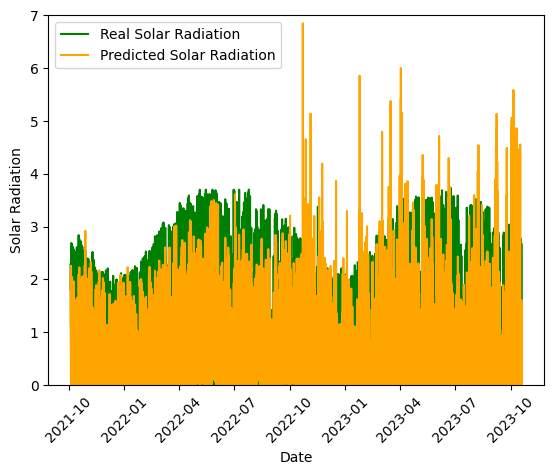

In [7]:
total_prediction = total_model.predict(total_test)
total_prediction = total_prediction.apply(lambda x: 0 if x < 0 else x)


# plt.title("Test Data Comparison")
plt.plot(total_test["solar_radiation"],label="Real Solar Radiation", c="g")
plt.plot(total_prediction, label="Predicted Solar Radiation", c="orange")
plt.legend(loc="best")
plt.ylim(bottom=0, top=7)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Solar Radiation")
plt.savefig("./graph/total_data.jpeg")
plt.show()

In [8]:
# 전체 데이터의 어트리뷰트 중 0.1 이상만
formula2 = "solar_radiation ~ temperature * wind_direction * wind_speed * total_cloud * humidity"

total_model2 = ols(formula2, data=total_train)
total_model2=total_model2.fit()
print("Adj R2: {}".format(total_model2.rsquared_adj))

Adj R2: 0.4684921223544032


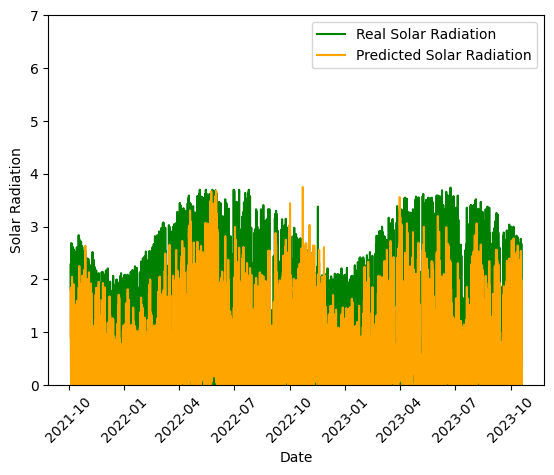

In [9]:
total_prediction2 = total_model2.predict(total_test)
total_prediction2 = total_prediction2.apply(lambda x: 0 if x < 0 else x)

# plt.title("Test Data Comparison with Pearson Value over 0.1")
plt.plot(total_test["solar_radiation"], label="Real Solar Radiation", c="g")
plt.plot(total_prediction2, label="Predicted Solar Radiation", c="orange")
plt.ylim(bottom=0, top=7)
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.xlabel("Date")
plt.ylabel("Solar Radiation")
plt.savefig("./graph/total_pearson_0.1.jpeg")
plt.show()

In [10]:
# 상관계수가 0.2 넘는 기상 요소들만
# formula3 = "solar_radiation ~ temperature  * humidity"
formula3 = "solar_radiation ~ temperature  * wind_direction * humidity"

total_model3 = ols(formula3, data=total_train)
total_model3=total_model3.fit()

print("Adj R2: {}".format(total_model3.rsquared_adj))

Adj R2: 0.4307986180906308


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae1 = mean_absolute_error(total_test["solar_radiation"], total_prediction)
mse1 = mean_squared_error(total_test["solar_radiation"], total_prediction)
rmse1 = np.sqrt(mse1)

mae2 = mean_absolute_error(total_test["solar_radiation"], total_prediction2)
mse2 = mean_squared_error(total_test["solar_radiation"], total_prediction2)
rmse2 = np.sqrt(mse2)

frame = pd.DataFrame(    
    columns=["MAE", "MSE", "RMSE"],
    index=["Experiment 1", "Experiment 2"],
    data=[[mae1, mse1, rmse1], [mae2, mse2, rmse2]],
    dtype="float"
    ).T

frame


,Experiment 1,Experiment 2
MAE,0.43845,0.413514
MSE,0.46507,0.368528
RMSE,0.68196,0.607065


In [69]:
errors = 0
for i in range(len(total_test["solar_radiation"])):
    print(total_test.index[i],total_test["solar_radiation"][i], total_prediction[i])
    
    errors += abs(total_test["solar_radiation"][i] - total_prediction[i])
print(errors / len(total_test["solar_radiation"]))

2021-10-04 10:00:00 1.81 1.1237943037344313
2021-10-04 11:00:00 1.83 1.5549658712768952
2021-10-04 12:00:00 2.07 1.6362384129639238
2021-10-04 13:00:00 2.3 1.8830229626664992
2021-10-04 14:00:00 2.11 2.2324380570711835
2021-10-04 15:00:00 2.16 2.2603457662769526
2021-10-04 16:00:00 1.65 1.8414655249596832
2021-10-04 17:00:00 0.63 1.2518485111855426
2021-10-04 18:00:00 0.18 0.9954004177091931
2021-10-04 19:00:00 0.01 0.770780585935023
2021-10-04 20:00:00 0.0 0.38377177129071915
2021-10-04 21:00:00 0.0 0.09674040953396101
2021-10-04 22:00:00 0.0 0.05662048127483765
2021-10-04 23:00:00 0.0 0.05410466385817658
2021-10-05 00:00:00 0.0 0.0
2021-10-05 01:00:00 0.0 0.0
2021-10-05 02:00:00 0.0 0.0
2021-10-05 03:00:00 0.0 0.0
2021-10-05 04:00:00 0.0 0.0
2021-10-05 05:00:00 0.0 0.0
2021-10-05 06:00:00 0.0 0.0
2021-10-05 07:00:00 0.01 0.0
2021-10-05 08:00:00 0.18 0.1172034606858545
2021-10-05 09:00:00 0.53 0.08526223594688531
2021-10-05 10:00:00 1.84 0.9149722103311666
2021-10-05 11:00:00 2.49 1.3

In [54]:
total_test

,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
date,,,,,,,,,
2021-10-04 10:00:00,26.5,0.0,1.3,200.0,79.0,27.2,2.0,1486.0,1.81
2021-10-04 11:00:00,27.5,0.0,2.4,160.0,73.0,26.8,7.0,1739.0,1.83
2021-10-04 12:00:00,27.7,0.0,1.9,160.0,67.0,24.9,7.0,1839.0,2.07
2021-10-04 13:00:00,29.0,0.0,1.7,140.0,62.0,24.7,5.0,1878.0,2.30
2021-10-04 14:00:00,28.7,0.0,2.4,270.0,60.0,23.5,1.0,1919.0,2.11
...,...,...,...,...,...,...,...,...,...
2023-10-18 19:00:00,18.7,0.0,1.8,180.0,72.0,15.5,2.0,4057.0,0.00
2023-10-18 20:00:00,16.4,0.0,0.7,200.0,84.0,15.6,3.0,3245.0,0.00
2023-10-18 21:00:00,14.4,0.0,0.5,70.0,88.0,14.4,6.0,2590.0,0.00
